In [1]:
import pandas as pd
import re

In [2]:
# Read in weather data
weather_data = pd.read_csv(
    '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data.csv',
    encoding='ISO-8859-1'   # or 'latin1'
)


In [3]:
weather_data.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,20/8/25,12:25 AM,63Ê¡F,55Ê¡F,77Ê%,N,8Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
1,20/8/25,12:55 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,12Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
2,20/8/25,1:25 AM,63Ê¡F,55Ê¡F,77Ê%,N,10Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
3,20/8/25,1:55 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,9Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
4,20/8/25,2:25 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,6Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy


In [4]:
# clean column names
weather_data.columns = (
    weather_data.columns.str.strip()
                   .str.lower()
                   .str.replace(' ', '_')
)

In [5]:
weather_data.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip.,condition
0,20/8/25,12:25 AM,63Ê¡F,55Ê¡F,77Ê%,N,8Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
1,20/8/25,12:55 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,12Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
2,20/8/25,1:25 AM,63Ê¡F,55Ê¡F,77Ê%,N,10Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
3,20/8/25,1:55 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,9Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy
4,20/8/25,2:25 AM,63Ê¡F,55Ê¡F,77Ê%,NNE,6Êmph,0Êmph,29.96Êin,0.0Êin,Mostly Cloudy


In [6]:
# Remove unwanted characters
def clean_text(x):
    if isinstance(x, str):
        # Remove non-ASCII characters (Ê, ¡, °, etc.)
        x = re.sub(r'[^\x00-\x7F]+', '', x)
        return x.strip()
    return x

weather_data = weather_data.applymap(clean_text)

/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_45672/1621821120.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weather_data = weather_data.applymap(clean_text)


In [7]:
weather_data.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip.,condition
0,20/8/25,12:25 AM,63F,55F,77%,N,8mph,0mph,29.96in,0.0in,Mostly Cloudy
1,20/8/25,12:55 AM,63F,55F,77%,NNE,12mph,0mph,29.96in,0.0in,Mostly Cloudy
2,20/8/25,1:25 AM,63F,55F,77%,N,10mph,0mph,29.96in,0.0in,Mostly Cloudy
3,20/8/25,1:55 AM,63F,55F,77%,NNE,9mph,0mph,29.96in,0.0in,Mostly Cloudy
4,20/8/25,2:25 AM,63F,55F,77%,NNE,6mph,0mph,29.96in,0.0in,Mostly Cloudy


In [8]:
# Convert numeric columns

def extract_number(s):
    """Extract first float or int number from a string."""
    if isinstance(s, str):
        match = re.search(r'[-+]?\d*\.?\d+', s)
        if match:
            return float(match.group())
    return pd.NA

numeric_cols = ['temperature', 'dew_point', 'humidity', 'wind_speed', 'wind_gust', 'pressure', 'precip.']
for col in numeric_cols:
    weather_data[col] = weather_data[col].apply(extract_number)


In [9]:
weather_data.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip.,condition
0,20/8/25,12:25 AM,63.0,55.0,77.0,N,8.0,0.0,29.96,0.0,Mostly Cloudy
1,20/8/25,12:55 AM,63.0,55.0,77.0,NNE,12.0,0.0,29.96,0.0,Mostly Cloudy
2,20/8/25,1:25 AM,63.0,55.0,77.0,N,10.0,0.0,29.96,0.0,Mostly Cloudy
3,20/8/25,1:55 AM,63.0,55.0,77.0,NNE,9.0,0.0,29.96,0.0,Mostly Cloudy
4,20/8/25,2:25 AM,63.0,55.0,77.0,NNE,6.0,0.0,29.96,0.0,Mostly Cloudy


In [10]:
# convert date + time into datetime

weather_data['timestamp'] = pd.to_datetime(
    weather_data['date'] + ' ' + weather_data['time'],
    format='%d/%m/%y %I:%M %p',
    errors='coerce'
)

In [11]:
weather_data.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip.,condition,timestamp
0,20/8/25,12:25 AM,63.0,55.0,77.0,N,8.0,0.0,29.96,0.0,Mostly Cloudy,2025-08-20 00:25:00
1,20/8/25,12:55 AM,63.0,55.0,77.0,NNE,12.0,0.0,29.96,0.0,Mostly Cloudy,2025-08-20 00:55:00
2,20/8/25,1:25 AM,63.0,55.0,77.0,N,10.0,0.0,29.96,0.0,Mostly Cloudy,2025-08-20 01:25:00
3,20/8/25,1:55 AM,63.0,55.0,77.0,NNE,9.0,0.0,29.96,0.0,Mostly Cloudy,2025-08-20 01:55:00
4,20/8/25,2:25 AM,63.0,55.0,77.0,NNE,6.0,0.0,29.96,0.0,Mostly Cloudy,2025-08-20 02:25:00


In [12]:
# Drop unneeded columns or reorder 
weather_data = weather_data[['timestamp', 'temperature', 'dew_point', 'humidity',
                   'wind_speed', 'wind_gust', 'pressure', 'precip.', 'condition']]


In [13]:
weather_data.tail()

,timestamp,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip.,condition
235,2025-08-24 21:55:00,61.0,54.0,77.0,2.0,0.0,30.16,0.0,Fair
236,2025-08-24 22:25:00,61.0,52.0,72.0,1.0,0.0,30.16,0.0,Fair
237,2025-08-24 22:55:00,59.0,52.0,77.0,1.0,0.0,30.16,0.0,Fair
238,2025-08-24 23:25:00,57.0,54.0,88.0,1.0,0.0,30.13,0.0,Fair
239,2025-08-24 23:55:00,57.0,54.0,88.0,1.0,0.0,30.13,0.0,Fair


In [14]:
# Rename Precip. column
weather_data.rename(columns={'precip.': 'precipitation'}, inplace=True)

In [15]:
weather_data.head()

,timestamp,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation,condition
0,2025-08-20 00:25:00,63.0,55.0,77.0,8.0,0.0,29.96,0.0,Mostly Cloudy
1,2025-08-20 00:55:00,63.0,55.0,77.0,12.0,0.0,29.96,0.0,Mostly Cloudy
2,2025-08-20 01:25:00,63.0,55.0,77.0,10.0,0.0,29.96,0.0,Mostly Cloudy
3,2025-08-20 01:55:00,63.0,55.0,77.0,9.0,0.0,29.96,0.0,Mostly Cloudy
4,2025-08-20 02:25:00,63.0,55.0,77.0,6.0,0.0,29.96,0.0,Mostly Cloudy


In [16]:
# convert to metric
# Fahrenheit to Celsius
weather_data['temperature'] = (weather_data['temperature'] - 32) * 5 / 9
weather_data['dew_point'] = (weather_data['dew_point'] - 32) * 5 / 9
# mph to m/s
weather_data['wind_speed'] = weather_data['wind_speed'] * 0.44704
weather_data['wind_gust'] = weather_data['wind_gust'] * 0.44704
# in to hPa (1 inch Hg = 33.8639 hPa)
weather_data['pressure'] = weather_data['pressure'] * 33.8639
# inches to mm
weather_data['precipitation'] = weather_data['precipitation'] * 25.4

In [17]:
weather_data

,timestamp,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation,condition
0,2025-08-20 00:25:00,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
1,2025-08-20 00:55:00,17.222222,12.777778,77.0,5.36448,0.0,1014.562444,0.0,Mostly Cloudy
2,2025-08-20 01:25:00,17.222222,12.777778,77.0,4.47040,0.0,1014.562444,0.0,Mostly Cloudy
3,2025-08-20 01:55:00,17.222222,12.777778,77.0,4.02336,0.0,1014.562444,0.0,Mostly Cloudy
4,2025-08-20 02:25:00,17.222222,12.777778,77.0,2.68224,0.0,1014.562444,0.0,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...
235,2025-08-24 21:55:00,16.111111,12.222222,77.0,0.89408,0.0,1021.335224,0.0,Fair
236,2025-08-24 22:25:00,16.111111,11.111111,72.0,0.44704,0.0,1021.335224,0.0,Fair
237,2025-08-24 22:55:00,15.000000,11.111111,77.0,0.44704,0.0,1021.335224,0.0,Fair
238,2025-08-24 23:25:00,13.888889,12.222222,88.0,0.44704,0.0,1020.319307,0.0,Fair


In [18]:
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp']).dt.tz_localize('Europe/Amsterdam', nonexistent='shift_forward')


In [19]:
weather_data.head()

,timestamp,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation,condition
0,2025-08-20 00:25:00+02:00,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
1,2025-08-20 00:55:00+02:00,17.222222,12.777778,77.0,5.36448,0.0,1014.562444,0.0,Mostly Cloudy
2,2025-08-20 01:25:00+02:00,17.222222,12.777778,77.0,4.47040,0.0,1014.562444,0.0,Mostly Cloudy
3,2025-08-20 01:55:00+02:00,17.222222,12.777778,77.0,4.02336,0.0,1014.562444,0.0,Mostly Cloudy
4,2025-08-20 02:25:00+02:00,17.222222,12.777778,77.0,2.68224,0.0,1014.562444,0.0,Mostly Cloudy


In [20]:
weather_data.to_csv(
    '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data_cleaned.csv',
    index=False
)


In [23]:
weather_df = pd.read_csv('/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data_cleaned.csv')

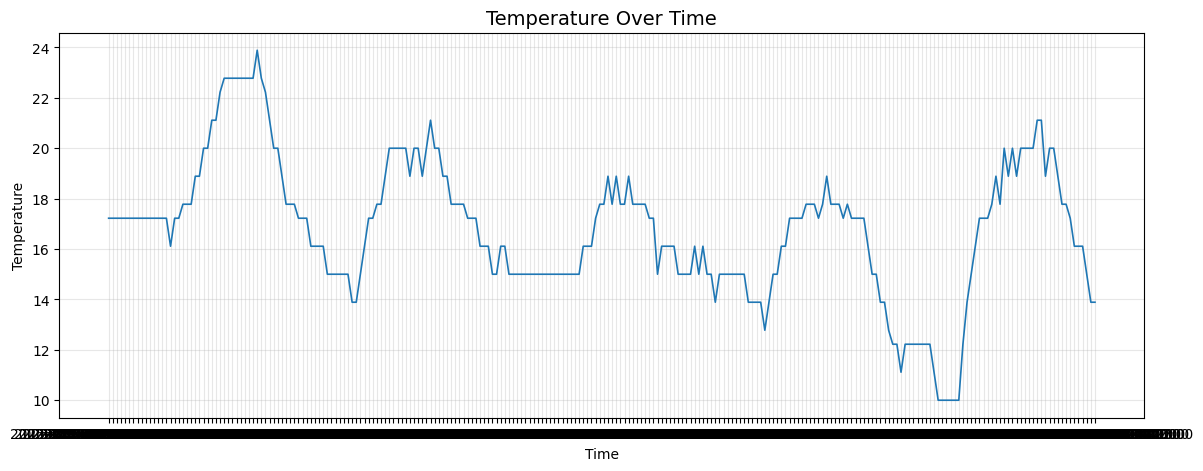

In [24]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['temperature'], lw=1.2)
plt.title("Temperature Over Time", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(alpha=0.3)
plt.show()


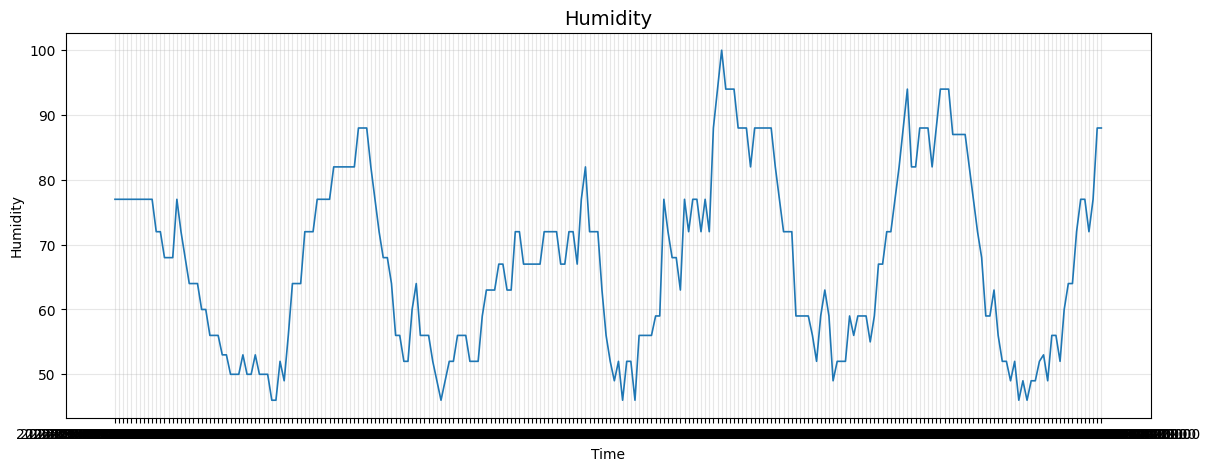

In [26]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['humidity'], lw=1.2)
plt.title("Humidity", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.grid(alpha=0.3)
plt.show()


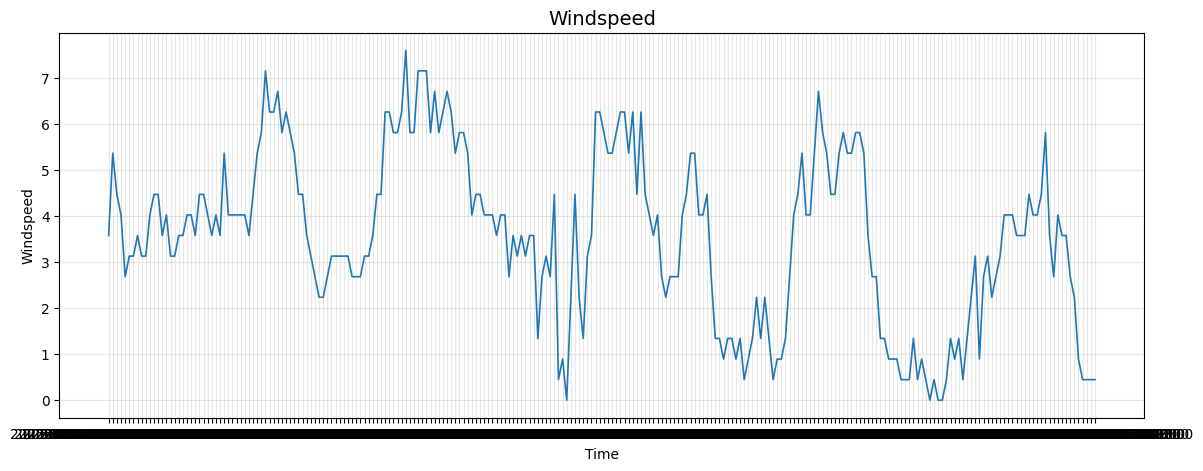

In [28]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['wind_speed'], lw=1.2)
plt.title("Windspeed", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Windspeed")
plt.grid(alpha=0.3)
plt.show()


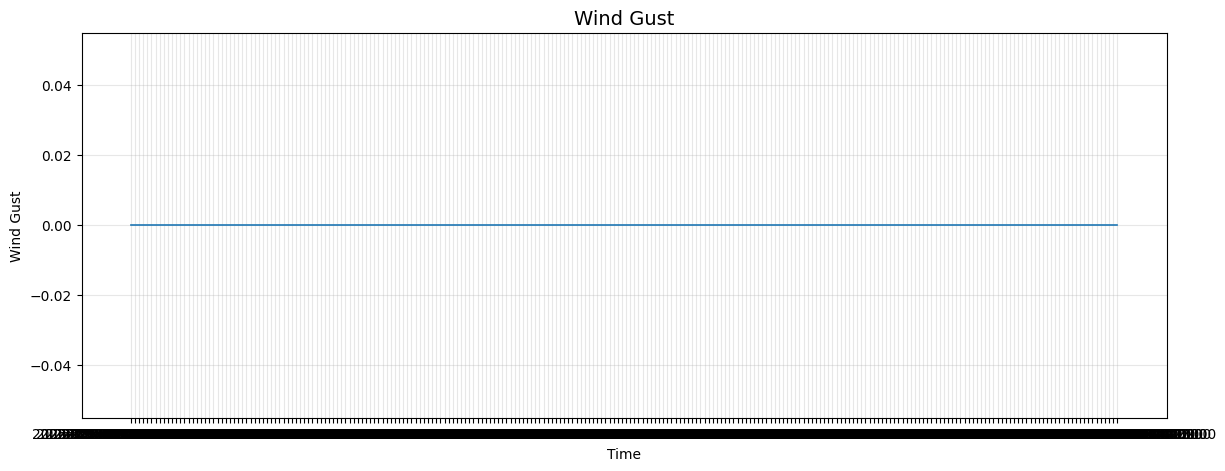

In [29]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['wind_gust'], lw=1.2)
plt.title("Wind Gust", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Wind Gust")
plt.grid(alpha=0.3)
plt.show()


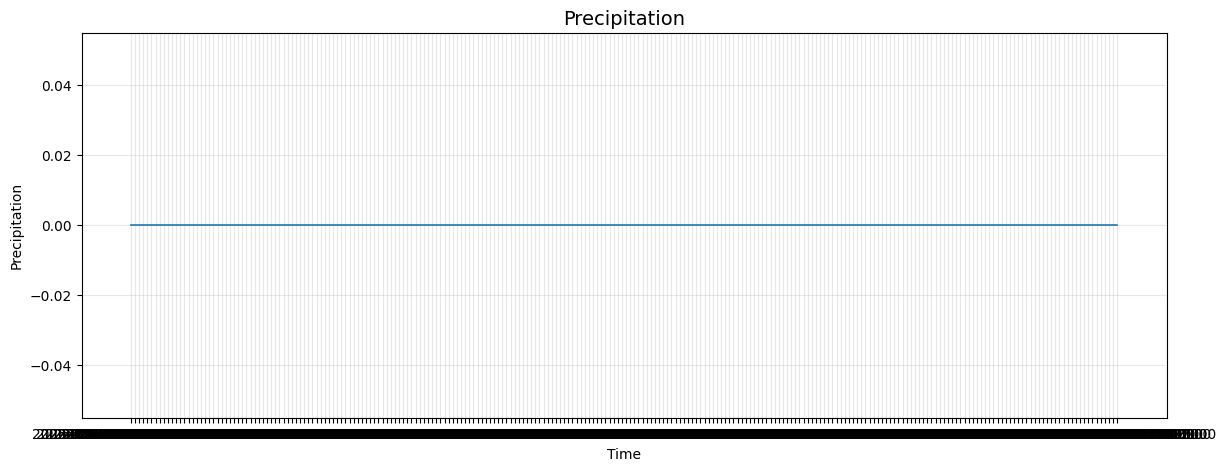

In [31]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['precipitation'], lw=1.2)
plt.title("Precipitation", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.grid(alpha=0.3)
plt.show()


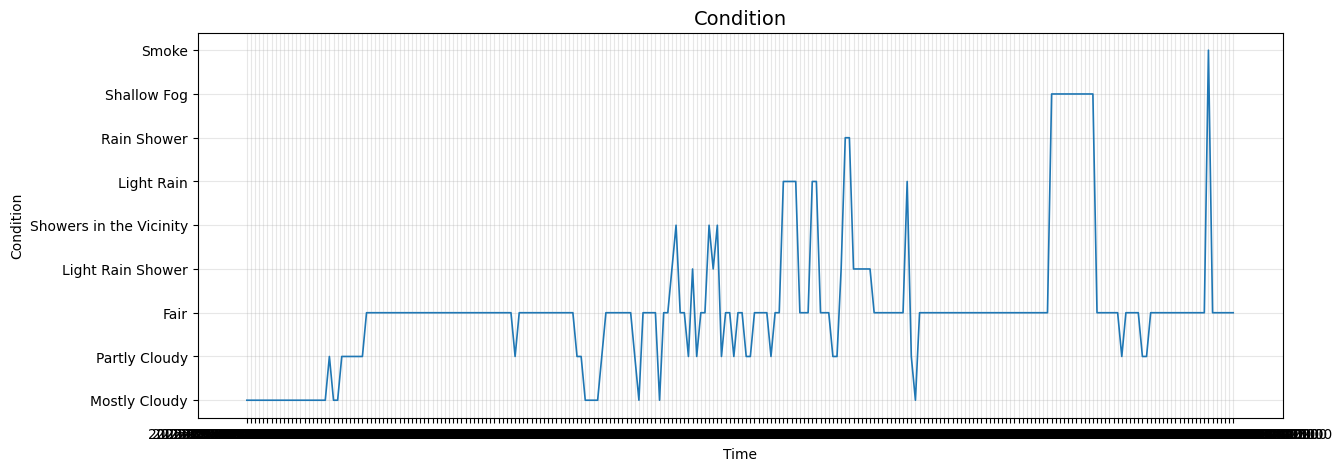

In [33]:
# Quick Overview - total crowd count over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weather_df['timestamp'], weather_df['condition'], lw=1.2)
plt.title("Condition", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Condition")
plt.grid(alpha=0.3)
plt.show()
